<a href="https://colab.research.google.com/github/Akbar-1056/bitlabs-project/blob/main/Project_Based_Learning_kelompok_3_cs03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Akbar-1056/bitlabs-project.git

fatal: destination path 'bitlabs-project' already exists and is not an empty directory.


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from scipy.stats import zscore


In [12]:
df1 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_transaction.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_request.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__promotion.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__company.csv')

In [ ]:
df1.head()

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,NaN,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,NaN,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,NaN,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,NaN,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,NaN,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498


In [ ]:
df2.head()

,dpt_id,total_fee_amount,document_type_name
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,380.0,PAY-OUT
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,273.6,PAY-OUT
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,19190.0,PAY-OUT
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,450.0,PAY-IN
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,1000.0,PAY-IN


In [ ]:
df3.head()

,dpt_promotion_id,promotion_code,promotion_name,transaction_promo_cashback_amount
0,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,0.0


In [ ]:
df4.head()

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-06-08 12:53:10
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-03-03 00:46:29
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2022-12-20 15:06:00
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,2021-12-07 22:39:58


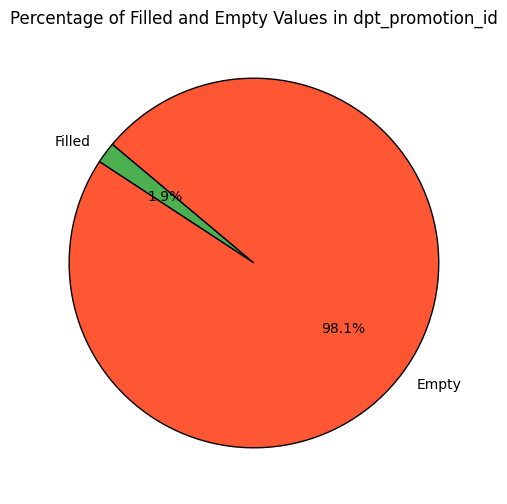

In [ ]:


# Menghitung nilai terisi dan kosong
filled_count = df4['dpt_promotion_id'].notnull().sum()
empty_count = df4['dpt_promotion_id'].isnull().sum()

# Menyusun data untuk pie chart
data = [filled_count, empty_count]
labels = ['Filled', 'Empty']
colors = ['#4CAF50', '#FF5733']

# Membuat pie chart
plt.figure(figsize=(8, 6))  # Mengatur ukuran grafik
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Filled and Empty Values in dpt_promotion_id')  # Menambahkan judul
plt.show()  # Menampilkan pie chart

In [ ]:
#Menampilkan hasil perhitungan
print(f"Jumlah baris terisi pada kolom department_id: {filled_count}")
print(f"Jumlah baris kosong pada kolom department_id: {empty_count}")

Jumlah baris terisi pada kolom department_id: 937
Jumlah baris kosong pada kolom department_id: 49063


In [17]:


# Pilih hanya kolom numerik untuk analisis
numeric_df4 = df4.select_dtypes(include=[np.number])

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df4)


In [18]:

# Tentukan dimensi input berdasarkan dataset yang telah distandarisasi
input_dim = scaled_data.shape[1]

# Membangun model autoencoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(32, activation='relu')(input_layer)
encoder = Dense(16, activation='relu')(encoder)
encoder = Dense(8, activation='relu')(encoder)

decoder = Dense(16, activation='relu')(encoder)
decoder = Dense(32, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model autoencoder
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=32, validation_split=0.2, shuffle=True)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.8646 - val_loss: 0.8654
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7654 - val_loss: 0.8653
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.8183 - val_loss: 0.8653
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7512 - val_loss: 0.8653
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.8200 - val_loss: 0.8653
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.8296 - val_loss: 0.8653
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.7945 - val_loss: 0.8653
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.7703 - val_loss: 0.8653
Epoch 9/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.7405 - val_loss: 0.8653
Epoch 10/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.7885 - val_loss: 0.8653
Epoch 11/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.8043 - val_loss: 0.8653
Epoch 12/50
1250/1250 ━━━━━━━━

In [11]:


# Rekonstruksi data
reconstructed_data = autoencoder.predict(scaled_data)

# Hitung Mean Squared Error (MSE) untuk setiap sampel
mse = np.mean(np.power(scaled_data - reconstructed_data, 2), axis=1)

# Tentukan threshold untuk mendeteksi anomali (misalnya, persentil 95 dari MSE)
threshold = np.percentile(mse, 95)

# Tandai sampel sebagai anomali jika MSE melebihi threshold
anomalies = mse > threshold

# Tampilkan hasil
print(f'Jumlah anomali terdeteksi: {np.sum(anomalies)}')
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mse)), mse, c=anomalies, cmap='viridis')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel('Data Point')
plt.ylabel('MSE')
plt.title('Anomaly Detection with Autoencoder')
plt.show()


NameError: name 'autoencoder' is not defined

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Jumlah anomali terdeteksi: 1727
Indeks data anomali: [   21    23    43 ... 49923 49950 49969]
Nilai data anomali:
[[-5.35312904  0.34774335 -0.42501476 -0.15370514 -0.02757858]
 [-5.35312904  0.34774335 -0.42501476 -0.15370514 -0.02757858]
 [-5.35312904  0.34774335 -0.42501476 -0.15370514 -0.02757858]
 ...
 [-5.35312904  0.34774335 -0.42501476 -0.15370514 -0.02757858]
 [-5.35312904  0.34774335 -0.42501476 -0.15370514 -0.02757858]
 [-5.35312904  0.34774335 -0.42501476 -0.15370514 -0.02757858]]


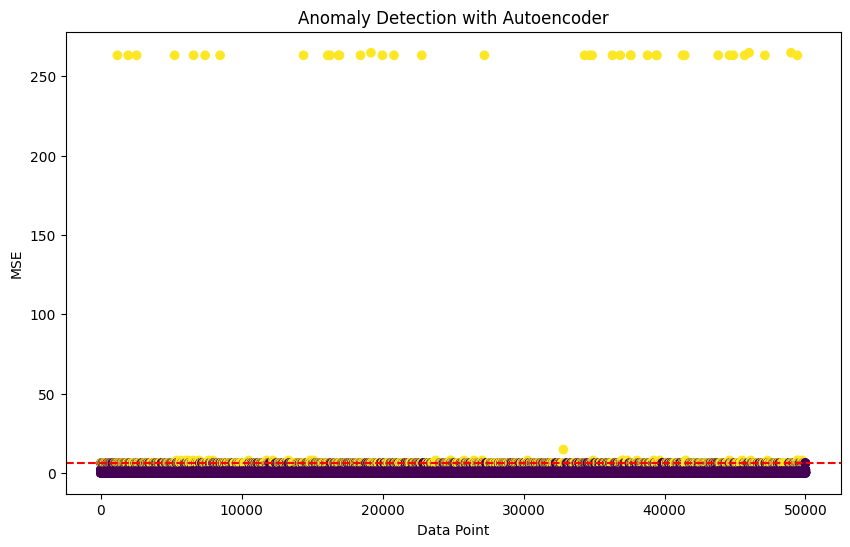

In [19]:

# Rekonstruksi data
reconstructed_data = autoencoder.predict(scaled_data)

# Hitung Mean Squared Error (MSE) untuk setiap sampel
mse = np.mean(np.power(scaled_data - reconstructed_data, 2), axis=1)

# Tentukan threshold untuk mendeteksi anomali (misalnya, persentil 95 dari MSE)
threshold = np.percentile(mse, 95)

# Tandai sampel sebagai anomali jika MSE melebihi threshold
anomalies = mse > threshold

# Tampilkan hasil
print(f'Jumlah anomali terdeteksi: {np.sum(anomalies)}')

# Tampilkan indeks dan nilai data anomali
anomaly_indices = np.where(anomalies)[0]
print(f'Indeks data anomali: {anomaly_indices}')
print(f'Nilai data anomali:\n{scaled_data[anomaly_indices]}')

# Plot hasil deteksi anomali
plt.figure(figsize=(10, 6))
plt.scatter(range(len(mse)), mse, c=anomalies, cmap='viridis')
plt.axhline(y=threshold, color='r', linestyle='--')
plt.xlabel('Data Point')
plt.ylabel('MSE')
plt.title('Anomaly Detection with Autoencoder')
plt.show()




Anomalies based on Z-Score:
                                                   dpt_id     dpt_promotion_id  \
14     a6dcc743fe284523416b67914fe1c5b11bb26e70999b92...                  NaN   
60     117647c0f6a590e1d4ae86d4070db184b4abf70616e582...                  NaN   
66     99adbea1d10cc1cd7e1a7889e96d071be7ebc81bc640c2...                  NaN   
94     987c479ab27d2f82d6f12a335c14a9e3612373a4708ffb...                  NaN   
202    d5715ca283e6e33071251e4d1bb627528662d0f25020e4...  promotion-251182596   
...                                                  ...                  ...   
49211  b9b922945bc3fc196fdecd5cf095935e0ccc27210380c4...                  NaN   
49331  6dcca70137204f9e5dc97866a1e033fe22f462c1ee695f...                  NaN   
49494  8c7ea4c22b3703fd8d61daddeb16ae4592f83c1c5b7495...                  NaN   
49622  6cb3ff25997a6312198c211d6525216574f095a270879f...                  NaN   
49985  64df847059e06e478a733fcedeed863c182bc59e9c2b86...                  NaN   

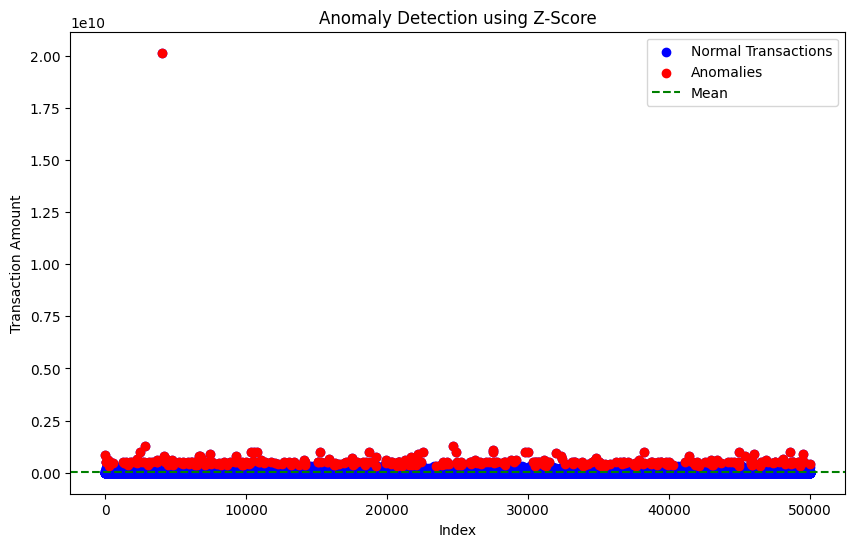

In [21]:

# Menghitung Z-Score untuk kolom 'transaction_amount'
df1['z_score'] = zscore(df1['transaction_amount'])

# Deteksi anomali berdasarkan Z-Score (misalnya ambang batas 3)
anomalies_zscore = df1[df1['z_score'].abs() > 3]

# Menampilkan hasil anomali
print("Anomalies based on Z-Score:\n", anomalies_zscore)

# Visualisasi Z-Score
plt.figure(figsize=(10, 6))
plt.scatter(df1.index, df1['transaction_amount'], c='blue', label='Normal Transactions')
plt.scatter(anomalies_zscore.index, anomalies_zscore['transaction_amount'], c='red', label='Anomalies')
plt.axhline(y=np.mean(df1['transaction_amount']), color='green', linestyle='--', label='Mean')
plt.xlabel('Index')
plt.ylabel('Transaction Amount')
plt.title('Anomaly Detection using Z-Score')
plt.legend()
plt.show()


In [26]:
filled_count = df1.notnull().sum()
empty_count = df1.isnull().sum()


print(f"Jumlah baris terisi pada kolom department_id: {filled_count}")
print(f"Jumlah baris kosong pada kolom department_id: {empty_count}")

Jumlah baris terisi pada kolom department_id: dpt_id                          50000
dpt_promotion_id                  937
buyer_id                        50000
seller_id                       50000
transaction_amount              50000
payment_method_name             50000
payment_provider_name           50000
transaction_created_datetime    50000
transaction_updated_datetime    50000
z_score                         50000
dtype: int64
Jumlah baris kosong pada kolom department_id: dpt_id                              0
dpt_promotion_id                49063
buyer_id                            0
seller_id                           0
transaction_amount                  0
payment_method_name                 0
payment_provider_name               0
transaction_created_datetime        0
transaction_updated_datetime        0
z_score                             0
dtype: int64
